In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [2]:
files=[file for file in os.listdir('Sales_Data/')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path='Sales_Data/'
all_data=pd.DataFrame()

for file in files:
    current_df=pd.read_csv(path+"/"+file)
    all_data=pd.concat([current_df,all_data])     

In [4]:
all_data.shape

(186850, 6)

In [5]:
all_data.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
5,248156,34in Ultrawide Monitor,1,379.99,09/13/19 14:59,"469 12th St, Los Angeles, CA 90001"
6,248157,Lightning Charging Cable,1,14.95,09/07/19 09:59,"773 Johnson St, Portland, ME 04101"
7,248158,Lightning Charging Cable,1,14.95,09/02/19 14:16,"682 Sunset St, Los Angeles, CA 90001"
8,248159,Vareebadd Phone,1,400.0,09/06/19 16:45,"664 Wilson St, New York City, NY 10001"
9,248160,Wired Headphones,1,11.99,09/01/19 22:03,"446 9th St, San Francisco, CA 94016"


In [6]:
all_data.to_csv('Sales_Data/all_data.csv', index=False)

In [7]:
df=all_data

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [9]:
df.shape

(186850, 6)

In [10]:
df.columns.to_list()

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [12]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
df.duplicated().sum()

1162

In [14]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

Order ID-0%
Product-0%
Quantity Ordered-0%
Price Each-0%
Order Date-0%
Purchase Address-0%


In [15]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum().sum()

0

In [18]:
'04/08/09 08:46'.split('/')[2]

'09 08:46'

In [19]:
def month(x):
    return x.split('/')[0]

In [20]:
df['month']=df['Order Date'].apply(month)

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [22]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [23]:
df['month']=df['month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [24]:
df['month'].unique()

array(['09', '10', 'Order Date', '11', '12', '05', '06', '03', '04', '07',
       '08', '01', '02'], dtype=object)

In [27]:
df.query('month == Order Date', inplace=True)
df

SyntaxError: invalid syntax (<unknown>, line 1)

In [30]:
a=df.loc[(df['month']=='Order Date')]
a

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
...,...,...,...,...,...,...,...
15280,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
17208,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
17324,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
17339,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [31]:
filter=df['month']=='Order Date'
df=df[~filter]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [32]:
df['month'].unique()

array(['09', '10', '11', '12', '05', '06', '03', '04', '07', '08', '01',
       '02'], dtype=object)

In [33]:
df.shape

(185950, 7)

In [34]:
df['month']=df['month'].astype('int64')
df['Quantity Ordered']=df['Quantity Ordered'].astype('int64')
df['Price Each']=df['Price Each'].astype(float)

In [35]:
df['Sales']=df['Price Each']*df['Quantity Ordered']

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


In [37]:
df.groupby(['month'])['Sales'].sum()

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

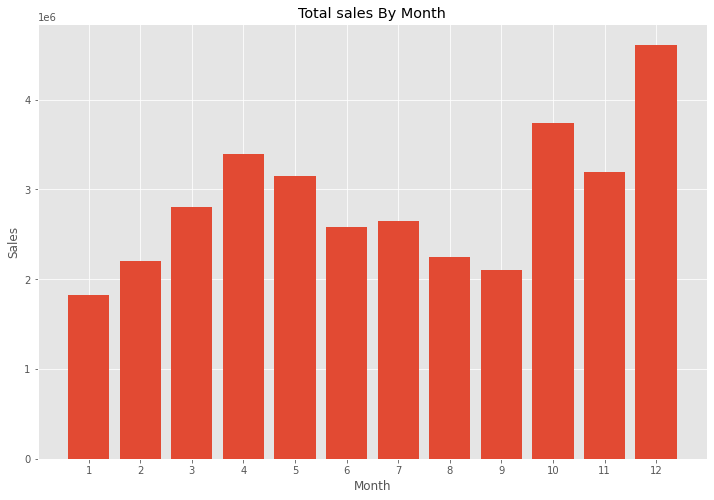

In [53]:
month=range(1,13)
plt.bar(month,df.groupby(['month'])['Sales'].sum())
plt.xticks(month)
plt.title('Total sales By Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [54]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [55]:
def city(x):
    return x.split(',')[1]

In [56]:
df['city']=df['Purchase Address'].apply(city)

In [57]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [59]:
df.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

<AxesSubplot:xlabel='city'>

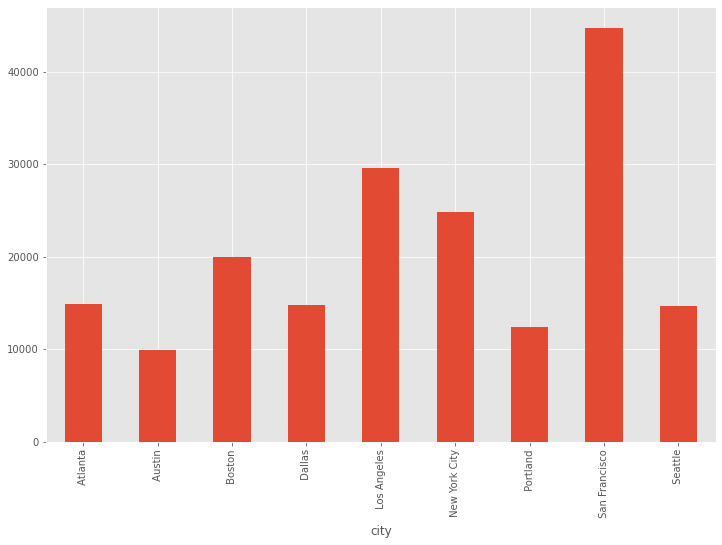

In [62]:
df.groupby('city')['city'].count().plot.bar()

In [65]:
df['Order Date'][0].dtype

dtype('O')

In [66]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour

In [68]:
keys=[]
hour=[]
for key,hour_df in df.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

In [70]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

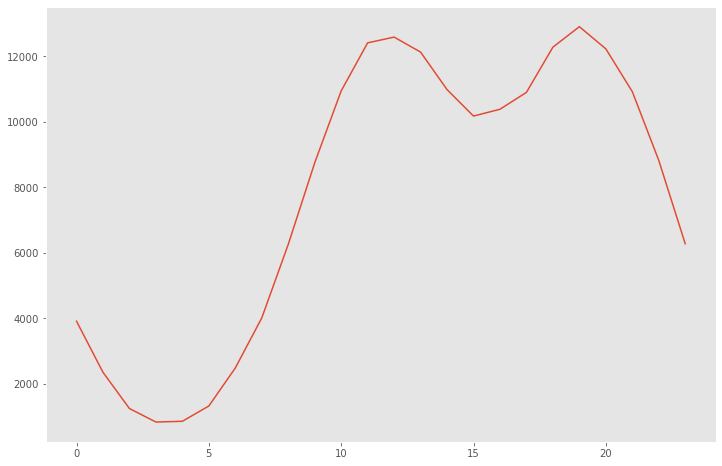

In [69]:
plt.grid()
plt.plot(keys,hour)

In [72]:
df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

<AxesSubplot:xlabel='Product'>

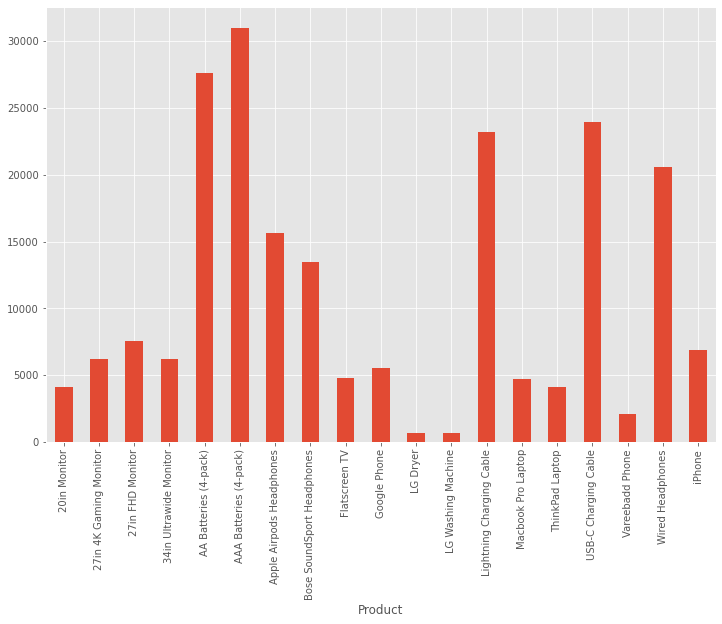

In [73]:
df.groupby('Product')['Quantity Ordered'].sum().plot.bar()

In [75]:
df.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [77]:
products=df.groupby('Product')['Quantity Ordered'].sum().index
quantity=df.groupby('Product')['Quantity Ordered'].sum()
prices=df.groupby('Product')['Price Each'].mean()

C:\Users\DELL\AppData\Local\Temp/ipykernel_2132/538475351.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

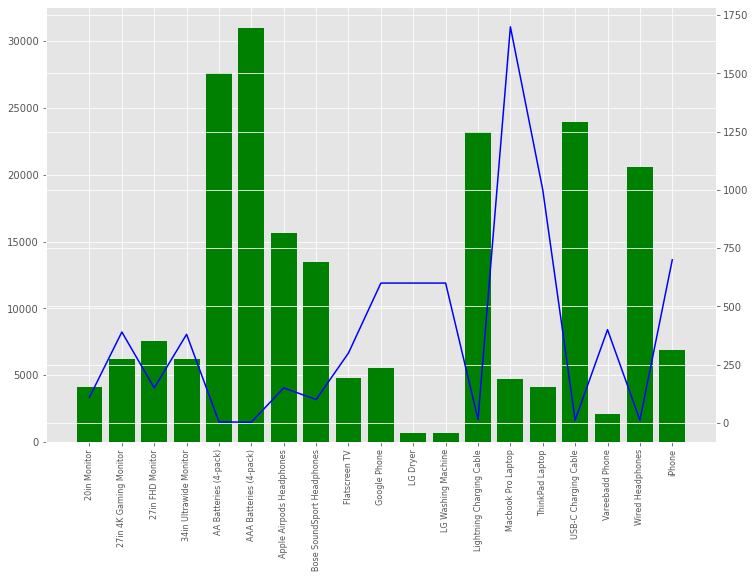

In [78]:
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

In [90]:
df1=df[df['Order ID'].duplicated(keep=False)]
df1.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Grouped


In [91]:
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [92]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Grouped
20,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco,10,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles,12,"Bose SoundSport Headphones,Google Phone"
117,248265,Vareebadd Phone,1,400.00,09/24/19 14:07,"939 14th St, San Francisco, CA 94016",9,400.00,San Francisco,14,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,Google Phone,1,600.00,09/30/19 20:36,"725 10th St, Portland, OR 97035",9,600.00,Portland,20,"Google Phone,Bose SoundSport Headphones"


In [86]:
df= df.drop_duplicates(subset=['Order ID'])

In [87]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Grouped
20,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco,10,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles,12,"Bose SoundSport Headphones,Google Phone"
117,248265,Vareebadd Phone,1,400.00,09/24/19 14:07,"939 14th St, San Francisco, CA 94016",9,400.00,San Francisco,14,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,Google Phone,1,600.00,09/30/19 20:36,"725 10th St, Portland, OR 97035",9,600.00,Portland,20,"Google Phone,Bose SoundSport Headphones"


<AxesSubplot:ylabel='Grouped'>

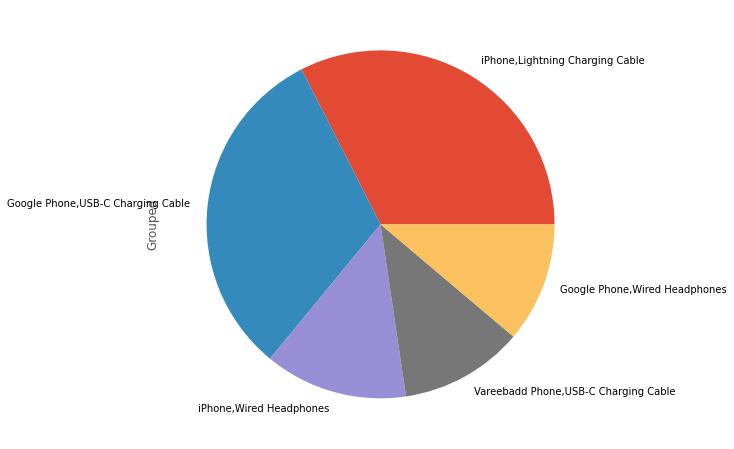

In [88]:
df['Grouped'].value_counts()[0:5].plot.pie()

In [89]:
df.shape

(7136, 11)